In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [202]:
dfx = pd.read_csv("healthdata.csv")
dfy = pd.read_csv("healthdata.csv")
dfo = pd.read_csv("healthdata.csv")

In [203]:
def laplaceMechanism(x, epsilon):
    x += np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

def gaussianMechanism(x, epsilon):
    x += np.random.normal(0, 1.0/epsilon, 1)[0]
    return x

In [204]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [205]:
dfy = dfy.iloc[1:]
dfx['age'] = dfx['age'].apply(laplaceMechanism, args=(0.5,))
dfy['age'] = dfy['age'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='problem'>

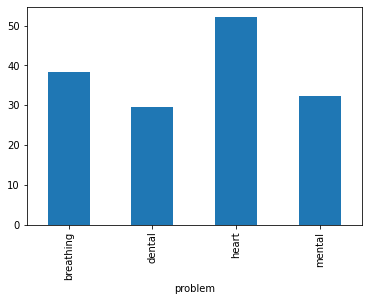

In [206]:
dfx.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

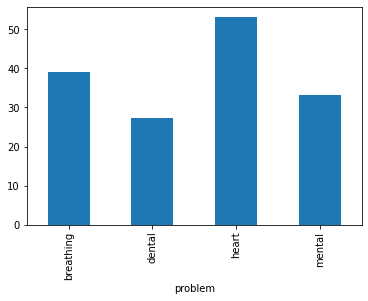

In [207]:
dfy.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

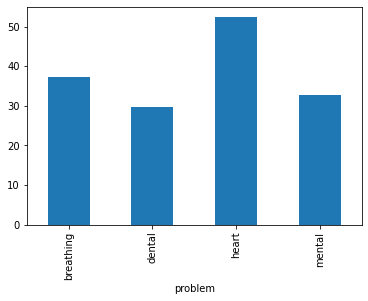

In [208]:
dfo.groupby("problem")['age'].mean().plot(kind='bar')

In [209]:
dfx['wage'] = dfx['wage'].apply(laplaceMechanism, args=(0.5,))
dfy['wage'] = dfy['wage'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='insured'>

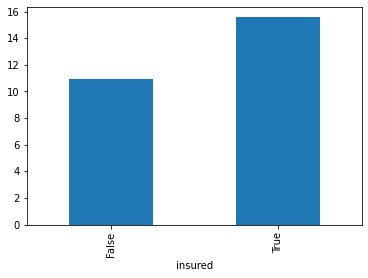

In [210]:
dfx.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

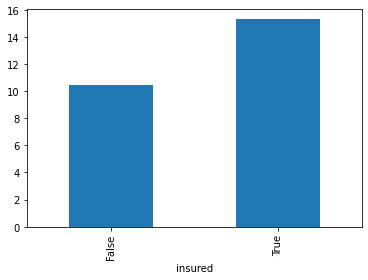

In [211]:
dfy.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

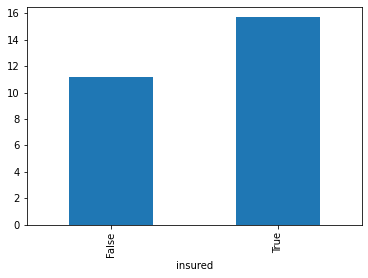

In [212]:
dfo.groupby("insured")['wage'].mean().plot(kind='bar')

In [213]:
epsilons = np.logspace(-2,2,25)
df_original = pd.read_csv("healthdata.csv")

In [214]:
average_change_mape = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(laplaceMechanism, args=(epsilon,))
    rms = mean_absolute_percentage_error(df_original['wage'].to_numpy(), 
                df_private['wage'].to_numpy())
    average_change_mape.append(rms)

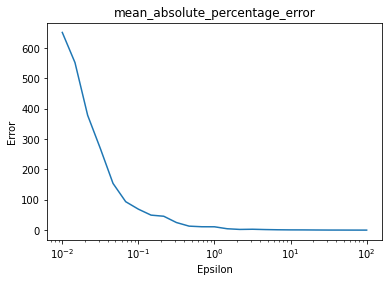

In [215]:
plt.semilogx(epsilons, average_change_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("mean_absolute_percentage_error")
plt.show()

In [216]:
rms_values = []
percentage = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(gaussianMechanism, args=(epsilon,))
    rms_values.append(mean_squared_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist(), squared=False))

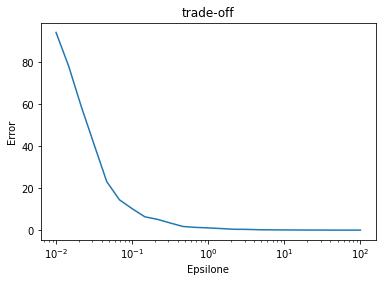

In [217]:
plt.semilogx(epsilons, rms_values)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("trade-off")
plt.show()